# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
<font color=blue>
* Вначале необходимо избавиться от пропусков
* Подготовить данные для анализа. Добавить нужные столбцы
* Построить графики, определить выбросы, избавиться от них
* Ответить на вопросы исследования </font>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [42]:
import pandas as pd
#data = pd.read_csv('C:/Users/Гаяне/Desktop/яндекс практика/real_estate_data.csv')
data = pd.read_csv('/datasets/real_estate_data.csv')
print(data.head())

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

###  Изменение формата данных, разделение столбцов

In [43]:
#Данные в неудобном формате, надо изменить разделение столбцов
#data = pd.read_csv ('C:/Users/Гаяне/Desktop/яндекс практика/real_estate_data.csv', sep='\t')
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [44]:
#data_for_test = pd.read_csv ('C:/Users/Гаяне/Desktop/яндекс практика/real_estate_data.csv', sep='\t') # копия фрейма, чтобы проверять изменения
data_for_test = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### Информация о данных
в данных есть пустые значения. Надо узнать какие значения пустые и какой тип данных

In [45]:
 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

В данных много пропусков. Это связано с тем, что данные вбивались людьми вручную, некоторые заполняли все, некоторые пропускали.
Только пропуски в столбце о количестве дней со дня размещения объявления, сокрее всего, была техническая проблема.
Для поставленной задачи понадобятся не все данные, а только: 
площадь, цена, число комнат, высота потолков, удаленность от центра, этажи, дата размещения объявления и продажа.

В некоторых данных нужно заменить тип данных с флот на инт - число дней, этаж, цена 
first_day_exposition изменить с типа объект на тип даты.


### Шаг 2. Предобработка данных

<font color=blue>Высота потолка в пропусках заменяется на медианное значение. Медиана меньше всего подвержена влиянию выбросов. Поскольку у нас нет других возможностей обработать эти пропуски. Также столбец с информацией об объявлении заменяется на медианное значение</font>

In [46]:
 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print('Пустые значения в столбце ceiling_height:', data['ceiling_height'].isna().sum())

data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
print('Пустые значения в столбце days_exposition:', data['days_exposition'].isna().sum())

Пустые значения в столбце ceiling_height: 0
Пустые значения в столбце days_exposition: 0


<font color=blue>Пустые значения в столбце balcony можно заменить на 0, поскольку, скорее всего, если не указано, то балкона нет</font>

In [47]:

data['balcony'] = data['balcony'].fillna(0)
print('Пустые значения в столбце balcony:', data['balcony'].isna().sum())

Пустые значения в столбце balcony: 0


<font color=blue>Пустые значения в столбце удаленность от центра можно заполнить медианой сгруппировав по населенному пункту.
Но в дальнейшем данные по населенным пунктам не понадобятся. Не важно ведь как далеко от центра Питера находится некий поселок. Именно поэтому этих данных и нет. Но надо проверить есть ли пустые значения в столбцах удаленность от центра с локацией "Питер".</font>

In [48]:
print(data_for_test.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].isna().sum())

61



<font color=blue> 61 пропуск в столбце "удаленность от центра" в Санкт-Петербурге заполняется медианой по данными по Питеру.</font>

In [49]:
data['median_cityCenters_nearest'] = data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].median()
data['cityCenters_nearest'] = data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].fillna(data['median_cityCenters_nearest'])
print(data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].isna().sum()) 

0


<font color=blue>Cтолбец с общим количеством этажей floors_total заменяется на медианное значение сгруппированное по этажу квартиры </font>

In [50]:
median_floors = data.groupby(['floor']).agg({'floors_total': 'median'}).rename(columns = {'floors_total':'medians_floor'})
new_data = data.merge(median_floors, on = ['floor'])

new_data['floors_total'] = new_data['floors_total'].fillna(new_data['medians_floor'])
print('Пустые значения в столбце floors_total до:', data['floors_total'].isna().sum())
print('Пустые значения в столбце floors_total после:', new_data['floors_total'].isna().sum())


Пустые значения в столбце floors_total до: 86
Пустые значения в столбце floors_total после: 0


## Изменение типа данных

In [51]:

new_data['days_exposition'] = new_data['days_exposition'].astype('int')
new_data['last_price'] = new_data['last_price'].astype('int')
new_data['floors_total'] = new_data['floors_total'].astype('int')
new_data['first_day_exposition'] = pd.to_datetime(new_data['first_day_exposition'])


In [52]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images                  23699 non-null int64
last_price                    23699 non-null int64
total_area                    23699 non-null float64
first_day_exposition          23699 non-null datetime64[ns]
rooms                         23699 non-null int64
ceiling_height                23699 non-null float64
floors_total                  23699 non-null int64
living_area                   21796 non-null float64
floor                         23699 non-null int64
is_apartment                  2775 non-null object
studio                        23699 non-null bool
open_plan                     23699 non-null bool
kitchen_area                  21421 non-null float64
balcony                       23699 non-null float64
locality_name                 23650 non-null object
airports_nearest              18157 non-null float64
cityCenters_nearest           15721 non-null float64
pa

### Заполнение пустых значений площади
Некоторые пустые значения в площади можно заменить с помощью данных об общей площади, вычитая кухню/жилую площадь
Остальные посчитать по медиане площади кухни и затем вычислить жилую площадь

In [53]:

kitchen_median = data['kitchen_area'].median()
living_median =  data['living_area'].median()

def fill_area(row):
    if not pd.isna(row['kitchen_area']) and not pd.isna(row['living_area']):
        pass
    elif pd.isna(row['kitchen_area']) and pd.isna(row['living_area']):
        row['kitchen_area'] = kitchen_median
        row['living_area'] = row['total_area'] - row['kitchen_area']
    elif pd.isna(row['living_area']):
        row['living_area'] = row['total_area'] - row['kitchen_area']
    elif pd.isna(row['kitchen_area']):
        row['kitchen_area'] = kitchen_median
    return row
new_data = data.apply(fill_area,axis=1)
print('Пустые значения в столбце kitchen_area до:', data['kitchen_area'].isna().sum())
print('Пустые значения в столбце kitchen_area после:', new_data['kitchen_area'].isna().sum())
print('Пустые значения в столбце living_area до:', data['living_area'].isna().sum())
print('Пустые значения в столбце living_area после:', new_data['living_area'].isna().sum())

Пустые значения в столбце kitchen_area до: 2278
Пустые значения в столбце kitchen_area после: 0
Пустые значения в столбце living_area до: 1903
Пустые значения в столбце living_area после: 0


### Вывод по разделу
<font color=blue> Пустые значения в столбцах "высота потолков" и "сколько дней было размещено объявление" было заполненно медианным значением, поскольку не было других данных по которым можно было бы заполнить эти пропуски, а медиана почти не подвержена влиянию крайних значений. 
Пустые значения в количестве балконов было заполнено на 0, поскольку, скорее всего, если нет данных, то нет и балкона:)
Пустые значения в столбце "расстояние до центра" заполнено медианой по Питеру.
Пустые значение в столбце площади были поссчитаны с помощью имеющихся данных. От общей площади вычтали площадь кухни - узнавали жилую площадь, и наоборот - для кухни. Остальные пропуски заполнены медианой. </font>


### Шаг 3. Посчитайте и добавьте в таблицу

Цена квадратного метра

In [54]:

new_data['price_metr2'] =  new_data['last_price'] / new_data['total_area']
new_data['price_metr2'] = new_data['price_metr2'].astype('int')


In [55]:

new_data['first_day_exposition'] = pd.to_datetime(new_data['first_day_exposition']) #глюк тренажера. пришлось еще раз преобразовывать
new_data['weekday_exposition'] = new_data['first_day_exposition'].dt.weekday
new_data['month_exposition'] = new_data['first_day_exposition'].dt.month
new_data['year_exposition'] = new_data['first_day_exposition'].dt.year

Добавления столбцов: день недели, месяц и год публикации объявления

In [56]:

new_data['weekday_exposition'] = new_data['first_day_exposition'].dt.weekday
new_data['month_exposition'] = new_data['first_day_exposition'].dt.month
new_data['year_exposition'] = new_data['first_day_exposition'].dt.year


Добавление в таблицу стоблца: этаж квартиры; варианты — первый, последний, другой

In [57]:
#Добавление в таблицу стоблца: этаж квартиры; варианты — первый, последний, другой;
def floor_group(row):
    floor = row['floor']
    floors_total = row['floors_total']        
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
         return 'последний'
    else:
        return 'другой'
    
new_data['floor_group'] = new_data.apply(floor_group, axis=1)
print(new_data['floor_group'].value_counts())

другой       17446
последний     3336
первый        2917
Name: floor_group, dtype: int64


<font color=blue> Можно, но в этом проекте лично я все равно это никак не будет использоваться. И вариантов всего 3. Как говорил Оккам - не надо плодить сущности без необходимости:) <font>

Добавление столбца: соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [58]:

new_data['part_living_area_total'] = new_data['living_area'] / new_data['total_area']
new_data['part_kitchen_area_total'] = new_data['kitchen_area'] / new_data['total_area']


In [59]:
new_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,median_cityCenters_nearest,price_metr2,weekday_exposition,month_exposition,year_exposition,floor_group,part_living_area_total,part_kitchen_area_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,95.0,12244.5,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,NaN,81.0,12244.5,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,574.0,558.0,12244.5,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,149.9,9,NaN,...,234.0,424.0,12244.5,408176,4,7,2015,другой,0.942767,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,12244.5,100000,1,6,2018,другой,0.320000,0.410000


### Вывод по разделу
В таблицу добавили нужные для дальнейших расчетов столбцы: номер этажа(первый, последний, другое), расчитана стоимость квадратного метра, добавлены столбцы с месяцем, днем недели и годом размещения  объявления

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Площадь, цена, число комнат, высота потолков
На полученной гистаграмме аспределение похоже на Пуассоновское. Но есть слишком большие и маленькие значения. больше 300 метров редко встречаается

Text(0, 0.5, 'Количество объявлений')

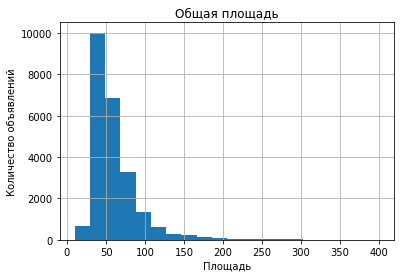

In [60]:

import matplotlib.pyplot as plt
new_data['total_area'].hist(range=(10, 400), bins=20);
new_data['total_area'].describe() 
plt.title("Общая площадь")
plt.xlabel("Площадь")
plt.ylabel("Количество объявлений")

Text(0.5, 1.0, 'Общая площадь')

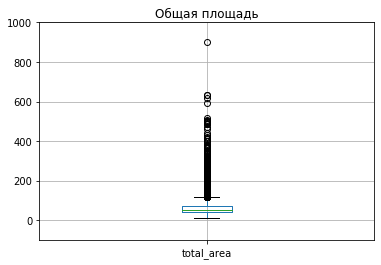

In [61]:
plt.ylim(-100, 1000)
new_data.boxplot('total_area');
plt.title("Общая площадь")

Text(0, 0.5, 'Количество объявлений')

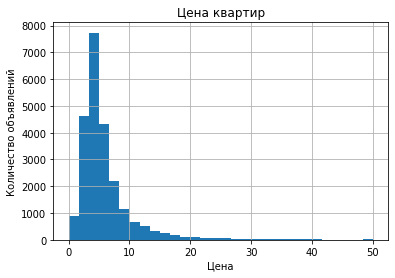

In [62]:

price_mln = new_data['last_price'] / 1000000
price_mln.hist(range=(0, 50), bins=30)
price_mln.describe() 
plt.title("Цена квартир")
plt.xlabel("Цена")
plt.ylabel("Количество объявлений")
#График похож на распределение Пуассона. Смущают только минимальные данные

Text(0, 0.5, 'Количество объявлений')

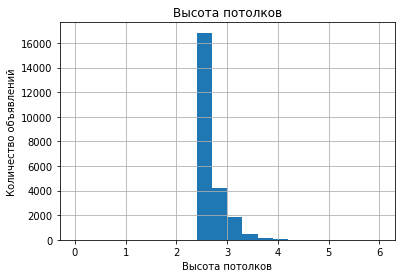

In [63]:

new_data['ceiling_height'].hist(range=(0, 6), bins=20); 
new_data['ceiling_height'].describe() 
plt.title("Высота потолков")
plt.xlabel("Высота потолков")
plt.ylabel("Количество объявлений")


Text(0, 0.5, 'Количество объявлений')

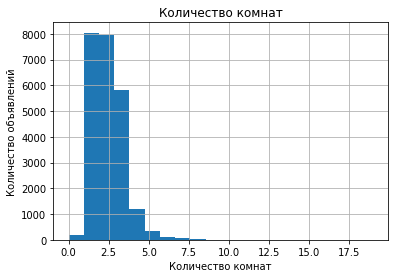

In [64]:

new_data['rooms'].hist(bins=20); 
new_data['rooms'].describe() 
plt.title("Количество комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Количество объявлений")
 

#### Вывод по графикам
Во всех случаях распределение похоже на пуассоновское. Но есть некоторое количество выбивающихся и аномальных значений. Такие как высота потолка 1 метр или 0 комнат в квартире.
Средняя цена квартир в Ленинградской области 5 мил.(от 1 до 10). Высота потолков 2,5 метра. Двушки самые популярные квартиры. Самая популярная площадь квартир 45 квадратных метров (от 45 до 80). Площадь больше 300 кв. встречается крайне редко. Прошли времена дворцов для одной семьи.

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


Text(0, 0.5, 'Количество объявлений')

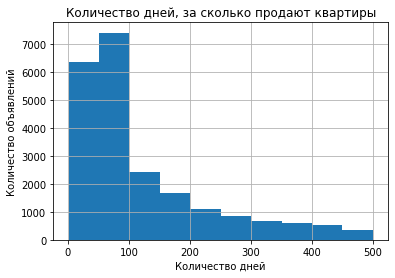

In [65]:

new_data['days_exposition'].hist(range=(1, 500))
print(new_data['days_exposition'].describe())
plt.title("Количество дней, за сколько продают квартиры")
plt.xlabel("Количество дней")
plt.ylabel("Количество объявлений")


В среднем квартиры продают за три месяца (95 дней). За 45 дней можно считать, что продажа пошла бытро. 198 дней - медленно

### Удаление редких значений

Количество дней, сколько висело объявление. Судя по графику значений большей 1000 дней можно считать редким и выбивающимся значением

In [87]:

good_data = new_data.query('days_exposition < 1000')
print('Доля редких значений в общих данных:', len(new_data.query('days_exposition < 1000')) / len(new_data))


Доля редких значений в общих данных: 0.9882695472382801


Площадь квартиры. Квартир площадью больше 350 квадратных метров можно считать редким значением, от которых можно избавиться
Также редкое значение площадь меньше 20 квадратных метров

In [88]:

good_data = good_data.query('total_area < 350 & total_area > 20')

print('Доля редких значений в общих данных:', len(new_data.query('total_area < 350 & total_area > 20')) / len(new_data))

Доля редких значений в общих данных: 0.9967931136334867


Количество комнат

Квартир где комнат больше 5 можно считать редким значением, от которых можно избавиться
Комнат не может быть меньше 1

In [89]:

good_data = good_data.query('rooms < 6 & rooms >= 1')
print('Доля редких значений в общих данных:', len(new_data.query('rooms < 6 and rooms >= 1')) / len(new_data))

Доля редких значений в общих данных: 0.9834592176885101


Цена квартиры
Квартир стоимостью больше 50 мил можно считать редким значением, от которых можно избавиться. Так же редки значения меньше 300тыс.их тоже можно отбросить

In [90]:

good_data = good_data.query('last_price < 40000000 and last_price > 300000')

print('Доля редких значений в общих данных:', len(new_data.query('last_price < 40000000 and last_price > 300000')) / len(new_data))


Доля редких значений в общих данных: 0.9917718047174986


Высота потолков
Потолки не могут быть меньше 1.7 метров, так же значения больше 5 метров встречаются редко, их можно удалить

In [96]:

good_data =  good_data.query('ceiling_height < 5 & ceiling_height > 1.7')
print('Доля редких значений в общих данных:', len(new_data.query('ceiling_height < 5 and ceiling_height > 1.7')) / len(new_data))



Доля редких значений в общих данных: 0.9983543609434997


In [97]:
print('Доля всех редких значений в общих данных:', 1 - len(good_data) / len(new_data))

Доля всех редких значений в общих данных: 0.03700578083463435


В результате очистки данных было потеряно 4% данных, это приемлемое значение. Остались данные по площади квартир от 20 до 350 квадратных метров, количество комнат от 1 до 5, высота потолков от 1,7 до 5, стоимость от 300тыс до  40 мил.

### Зависимость цены от площади, числа комнат, удалённости от центра
Самая высокая корреляция между площадью квартиры и ценой. Чем больше квартира, тем она дороже. 
Чуть в меньшей степени цена зависит от количества комнат и удаленности от города

In [98]:


print('Корреляция цены и количества комнат по оэффициенту Пирсона:', good_data['rooms'].corr(good_data['last_price']))
print('Корреляция цены и площади квартиры по оэффициенту Пирсона:', good_data['total_area'].corr(good_data['last_price']))
print('Корреляция цены и удаленности от города по оэффициенту Пирсона:', good_data['cityCenters_nearest'].corr(good_data['last_price']))


Корреляция цены и количества комнат по оэффициенту Пирсона: 0.47408029152680015
Корреляция цены и площади квартиры по оэффициенту Пирсона: 0.7773516573085631
Корреляция цены и удаленности от города по оэффициенту Пирсона: -0.3927849388404451


Матрица рассеяния показывает, как связаны между собой цена, площадь, количество комнат и удаленность от города

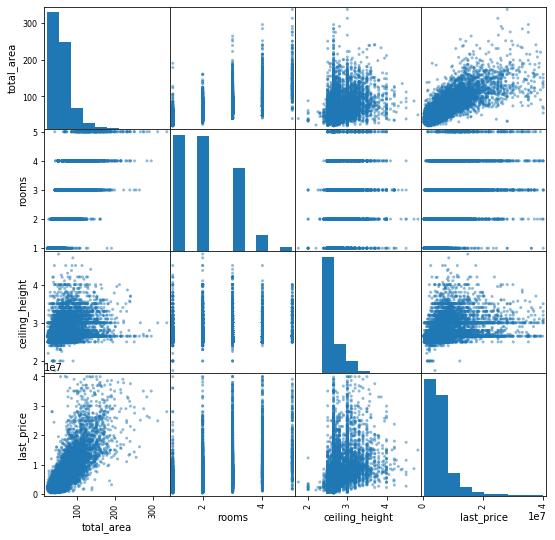

In [99]:
matrix_data = good_data[['total_area','rooms','ceiling_height', 'last_price']]
pd.plotting.scatter_matrix(matrix_data, figsize=(9, 9));



In [102]:
matrix_data.corr() #Почему нам про это не рассказывали?)

,total_area,rooms,ceiling_height,last_price
total_area,1.000000,0.770059,0.362946,0.777352
rooms,0.770059,1.000000,0.191038,0.474080
ceiling_height,0.362946,0.191038,1.000000,0.404814
last_price,0.777352,0.474080,0.404814,1.000000


### Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
Цена квартиры ниже, если этаж первый, в остальных случаях этаж практически не влияет на цену

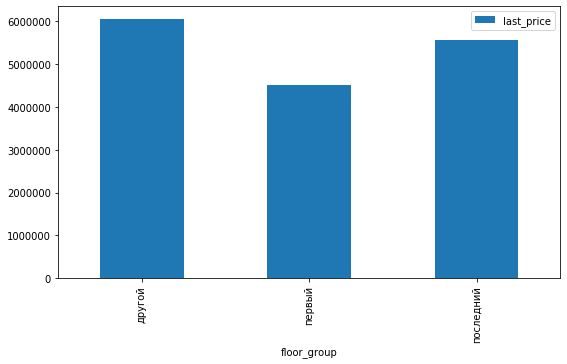

In [103]:


good_data.pivot_table(index='floor_group', values='last_price').plot(kind='bar', figsize=(9, 5));


### Зависимость цены от даты размещения: дня недели, месяца и года


Text(0, 0.5, 'Цена')

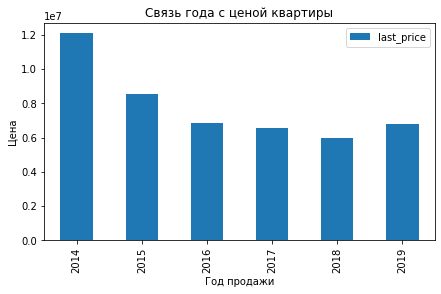

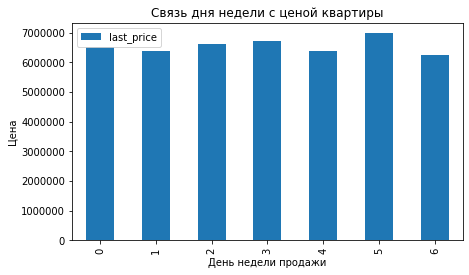

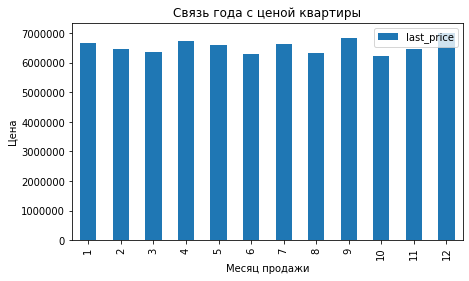

In [104]:
new_data.pivot_table(index= ['year_exposition'], values='last_price').plot(kind='bar', figsize=(7, 4));
plt.title("Связь года с ценой квартиры")
plt.xlabel("Год продажи")
plt.ylabel("Цена")
new_data.pivot_table(index= ['weekday_exposition'], values='last_price').plot(kind='bar', figsize=(7, 4));
plt.title("Связь дня недели с ценой квартиры")
plt.xlabel("День недели продажи")
plt.ylabel("Цена")
new_data.pivot_table(index= ['month_exposition'], values='last_price').plot(kind='bar', figsize=(7, 4));
plt.title("Связь года с ценой квартиры")
plt.xlabel("Месяц продажи")
plt.ylabel("Цена")



Цена практически не зависит от дня недели и месяца размещения объявления. 
Есть небольшая зависимость от года. Как видно на графике в 2014 квартиры были дороже всего. Связано это с ценами на рынке

## Выводы по разделу
* Цена квартиры ниже, если этаж первый, в остальных случаях этаж практически не влияет на цену
* Самая высокая корреляция между площадью квартиры и ценой. Чем больше квартира, тем она дороже. 
* Чуть в меньшей степени цена зависит от количества комнат и удаленности от города
* Цена практически не зависит от дня недели и месяца размещения объявления. Есть небольшая зависимость от года. Как видно на графике в 2014 квартиры были дороже всего. Связано это с ценами на рынке

### Топ 10 населеннных пунктов с  наибольшим числом объявлений

In [105]:

locality_for_ten = good_data.query('locality_name != "Санкт-Петербург"').groupby(by='locality_name').agg({'price_metr2': 'mean'}).sort_values(by = 'price_metr2', ascending=False).head(10)

print(locality_for_ten)
good_data.query('locality_name == "деревня Кудрово"')['price_metr2'].describe()
print('Самая низкая цена за квадратный метр в деревне Кудрово:', new_data.query('locality_name == "деревня Кудрово"')['price_metr2'].min())
print('Самая высокая цена за квадратный метр в деревне Кудрово:', new_data.query('locality_name == "деревня Кудрово"')['price_metr2'].max())
print('Самая низкая цена за квадратный метр в поселке Лисий Нос:', new_data.query('locality_name == "посёлок Лисий Нос"')['price_metr2'].min())
print('Самая высокая цена за квадратный метр в поселке Лисий Нос:', new_data.query('locality_name == "посёлок Лисий Нос"')['price_metr2'].max())


                     price_metr2
locality_name                   
посёлок Лисий Нос  168706.000000
Зеленогорск        115122.500000
посёлок Репино     104238.500000
Пушкин             103280.798883
Сестрорецк         101951.620879
Кудрово             99975.419162
деревня Мистолово   98549.545455
посёлок Левашово    96997.000000
Мурино              92479.545455
деревня Кудрово     92238.571942
Самая низкая цена за квадратный метр в деревне Кудрово: 54160
Самая высокая цена за квадратный метр в деревне Кудрово: 142857
Самая низкая цена за квадратный метр в поселке Лисий Нос: 74525
Самая высокая цена за квадратный метр в поселке Лисий Нос: 168706


Из топ 10 поселков в поселке "Лисий нос" самая высокая стоимость квадратного метра - 168 тыс. за квадратный метр. В послке Лисий Нос минимальная цена за квадратный метр 74 тыс, максимальная 168тыс.
В Кудрово самая низкая - 92тыс. Минимальная цена квадратного метра в деревне - 54тыс, максимальная 142тыс. 

###  Определение цетра Петербурга и анализ данных

Text(0, 0.5, 'Цена')

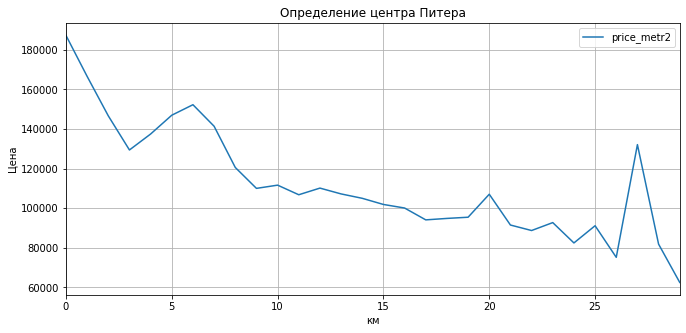

In [108]:
# Проверим, связан ли пик с тем, что мы отбросили лишние данные.
new_data['spb_km_centr'] = new_data['cityCenters_nearest'] / 1000

import numpy as np

new_data['spb_km_centr'] = new_data['spb_km_centr'].apply(np.floor)


new_data.query('locality_name == "Санкт-Петербург"').groupby(['spb_km_centr']).agg({'price_metr2': 'mean'}).plot(grid=True, figsize=(11, 5))

plt.title("Определение центра Питера")
plt.xlabel("км")
plt.ylabel("Цена")


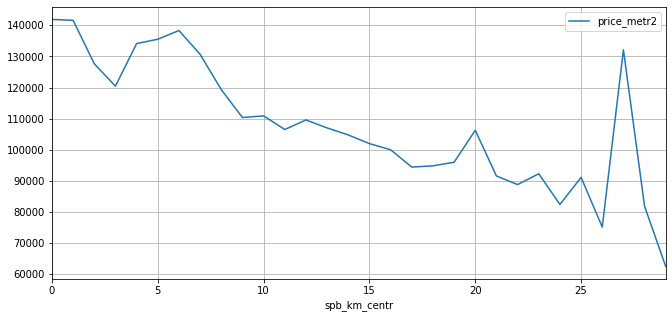

In [109]:
good_data['spb_km_centr'] = good_data['cityCenters_nearest'] / 1000

import numpy as np

good_data['spb_km_centr'] = good_data['spb_km_centr'].apply(np.floor)


good_data.query('locality_name == "Санкт-Петербург"').groupby(['spb_km_centr']).agg({'price_metr2': 'mean'}).plot(grid=True, figsize=(11, 5))


Я проверила данные до удаления редких значений и после - пики остаются. Возможно они связаны с тем, что в населенных пунктах слишком мало квартир или это какие-то престижные районы. 
Центр Питера по графику - 9 км.

Площадь, цена, число комнат, высота потолков

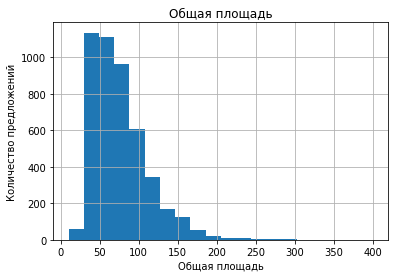

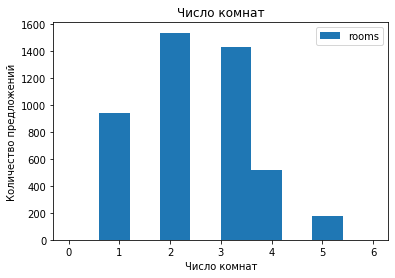

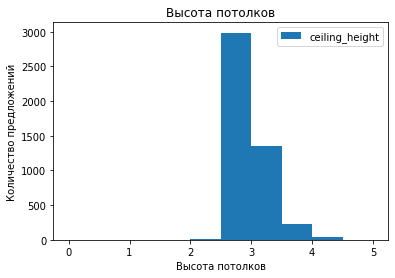

In [38]:

spb_data = good_data.query('spb_km_centr <= 9')
spb_data['total_area'].hist(range=(10, 400), bins=20)
plt.title("Общая площадь")
plt.xlabel("Общая площадь")
plt.ylabel("Количество предложений")
spb_data.plot(y='rooms', kind = 'hist', range = (0, 6))
plt.title("Число комнат")
plt.xlabel("Число комнат")
plt.ylabel("Количество предложений")
spb_data.plot(y='ceiling_height', kind = 'hist', range = (0, 5))
plt.title("Высота потолков")
plt.xlabel("Высота потолков")
plt.ylabel("Количество предложений")
plt.show()


#### Вывод
Площадь в центре Питера от 45 до 80 квадратных метров
Больше всего квартир двушек, меньше трешек и однушек
Высота потолков от 2,5 до 3,5 в среднем

### Влияние числа комнат, этажа, удалённости от центра, дата размещения объявления на цену

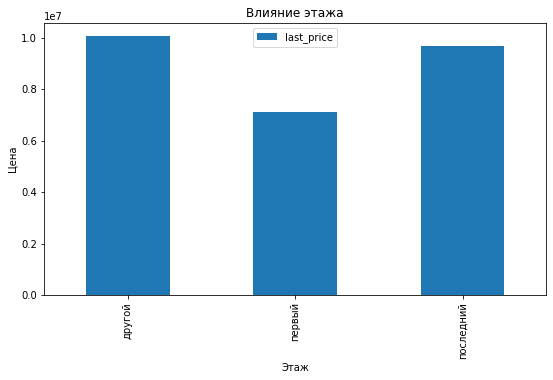

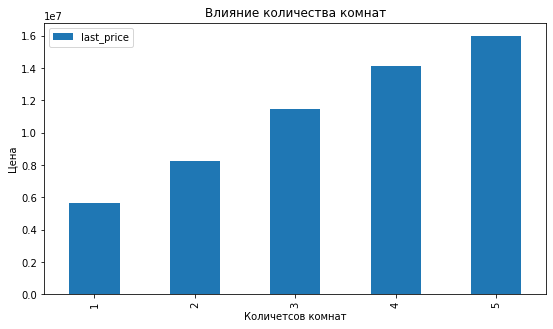

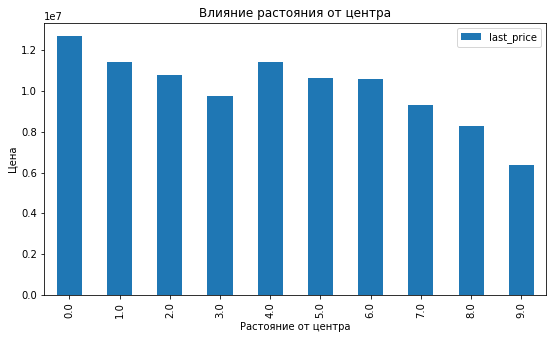

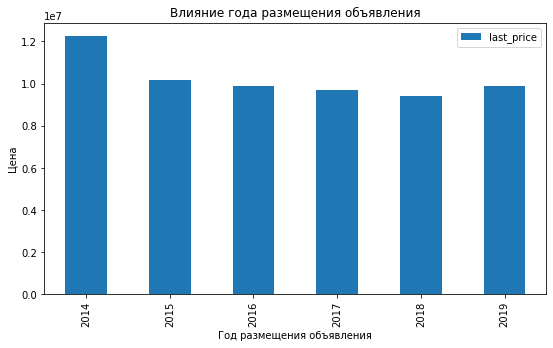

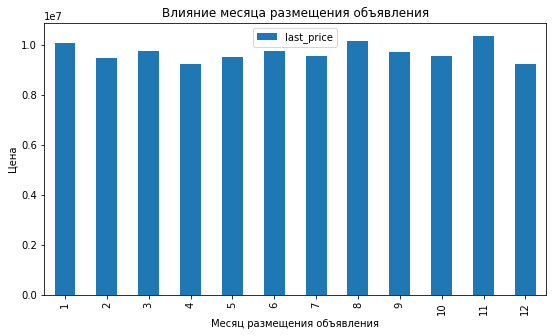

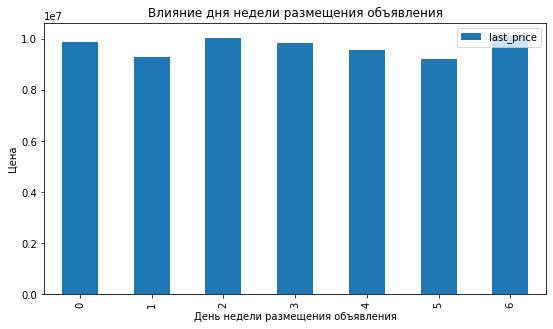

In [39]:

spb_data.pivot_table(index='floor_group', values='last_price').plot(kind='bar', figsize=(9, 5))
plt.title("Влияние этажа")
plt.xlabel("Этаж")
plt.ylabel("Цена")
spb_data.pivot_table(index='rooms', values='last_price').plot(kind='bar', figsize=(9, 5))
plt.title("Влияние количества комнат")
plt.xlabel("Количетсов комнат")
plt.ylabel("Цена")
spb_data.pivot_table(index='spb_km_centr', values='last_price').plot(kind='bar', figsize=(9, 5))
plt.title("Влияние растояния от центра")
plt.xlabel("Растояние от центра")
plt.ylabel("Цена")
spb_data.pivot_table(index='year_exposition', values='last_price').plot(kind='bar', figsize=(9, 5))
plt.title("Влияние года размещения объявления")
plt.xlabel("Год размещения объявления")
plt.ylabel("Цена")
spb_data.pivot_table(index='month_exposition', values='last_price').plot(kind='bar', figsize=(9, 5))
plt.title("Влияние месяца размещения объявления")
plt.xlabel("Месяц размещения объявления")
plt.ylabel("Цена")
spb_data.pivot_table(index='weekday_exposition', values='last_price').plot(kind='bar', figsize=(9, 5))
plt.title("Влияние дня недели размещения объявления")
plt.xlabel("День недели размещения объявления")
plt.ylabel("Цена")


plt.show()


#### Влияние числа комнат, этажа, удалённости от центра, дата размещения объявления на цену

In [40]:


print('Спб.Корреляция цены и удаленности от центра по коэффициенту Пирсона:', spb_data['spb_km_centr'].corr(good_data['last_price']))
print('Спб.Корреляция цены и количества комнат по коэффициенту Пирсона:', spb_data['rooms'].corr(good_data['last_price']))
print('Спб.Корреляция цены и месяца размещения объявления по коэффициенту Пирсона:', spb_data['month_exposition'].corr(good_data['last_price']))
print('Спб.Корреляция цены и года размещения объявления по коэффициенту Пирсона:', spb_data['year_exposition'].corr(good_data['last_price']))

Спб.Корреляция цены и удаленности от центра по коэффициенту Пирсона: -0.22835957098350218
Спб.Корреляция цены и количества комнат по коэффициенту Пирсона: 0.46702846088567057
Спб.Корреляция цены и месяца размещения объявления по коэффициенту Пирсона: 0.009085880391583657
Спб.Корреляция цены и года размещения объявления по коэффициенту Пирсона: -0.025152793708919208


In [41]:
print('Корреляция цены и удаленности от центра по коэффициенту Пирсона:', good_data['spb_km_centr'].corr(good_data['last_price']))
print('Корреляция цены и количества комнат по коэффициенту Пирсона:', good_data['rooms'].corr(good_data['last_price']))
print('Корреляция цены и месяца размещения объявления по коэффициенту Пирсона:', good_data['month_exposition'].corr(good_data['last_price']))
print('Корреляция цены и года размещения объявления по коэффициенту Пирсона:', good_data['year_exposition'].corr(good_data['last_price']))

Корреляция цены и удаленности от центра по коэффициенту Пирсона: -0.3917909627712122
Корреляция цены и количества комнат по коэффициенту Пирсона: 0.47408029152680015
Корреляция цены и месяца размещения объявления по коэффициенту Пирсона: 0.0036339097314965767
Корреляция цены и года размещения объявления по коэффициенту Пирсона: -0.025978041543020452


### Вывод
 Цена завист от количества комнат, от площади чем больше, тем дороже. Перввый этаж дешевле остальных. От дня недели размещения объявления цена не меняется. Есть зависиомть от года. 

### Шаг 5. Общий вывод

Поскольку часть данных заполнялась вручную пользоавтелями в данных было много пропусков. 
Пропуски были заполнены в некоторых случаях средним значением (высота потолков), в других - посчитаны исходя из имеющихся данных (площадь кухни) или на основании здравого смысла(0 там, где не указан балкон). 
В данных были некоторые выбивающиеся, редкие значения, которые были удалены. 
* В Леинградской области цены на квартиры в среднем колеблятся от 1 до 10 мил. Площадь квартир как правило не превышает 300кв метров. Комнат от 1 до 5.  
* Цена практически не зависит от дня недели и месяца размещения объявления. Чуть чаще покупают в декабре-январе. Есть небольшая зависимость от года. Как видно на графике в 2014 квартиры были дороже всего. Связано это с ценами на рынке.  
* Самая высокая корреляция между площадью квартиры и ценой. Удивительно, но факт: чем больше квартира, тем она дороже(корреляция 0,7 по Пирссону). Чуть в меньшей степени цена зависит от количества комнат (конечно, ведь планеровка бывает разной) и удаленности от города(корреляция 0,4)
* Из топ 10 поселков в поселке "Лисий нос" самая высокая стоимость квадратного метра - 168 тыс. за квадратный метр. В послке Лисий Нос минимальная цена за квадратный метр 74 тыс, максимальная 168тыс. Деревня "Кудрово" самая низкая - 92тыс. Минимальная цена квадратного метра в деревне - 54тыс, максимальная 142тыс. 
* В среднем квартиры продают за три месяца (95 дней). За 45 дней можно считать, что продажа пошла бытро. 198 дней - медленно
* Центр Питера - область в радиусе 9км. Первый этаж дешевле всего. Цены на последний этаж немного ниже, чем на остальных этажах. 
* Цена завист от количества комнат, от площади чем больше, тем дороже. Перввый этаж дешевле остальных. Удаленность от города не принципиальна, когда речь идет о 9 км. От дня недели размещения объявления цена не меняется. Цена зависит от года продажи. Площадь квартир в центре Питера от 45 до 80 квадратных метров. Больше всего квартир двушек, меньше трешек и однушек Высота потолков от 2,5 до 3,5 в среднем
В целом разница между центром и областью в плане зависимости цены от количества комнат, времени размещения объявления небольшая. 
